In [12]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

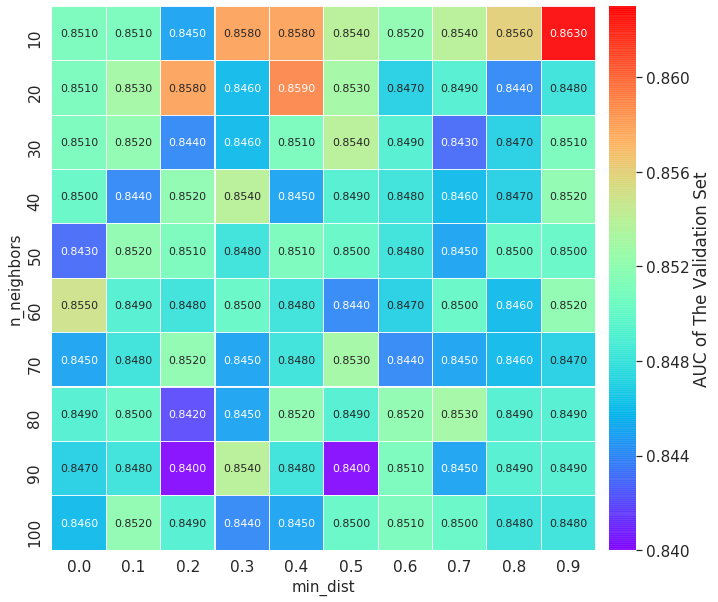

In [15]:
log_file = 'Tox21_search_Mon_Feb__3_11-00-12_2020.log'
df = pd.read_csv(log_file)
n_neighbors_list = df.n_neighbors.unique()
min_dist_list = df.min_dist.unique()
x = df.valid_best_auc.values.reshape(len(n_neighbors_list), len(min_dist_list))
dfr = pd.DataFrame(x, index = min_dist_list, columns = n_neighbors_list).round(3)
fig, ax = plt.subplots(figsize = (12,10))
sns.set(font_scale = 1.4)
sns.heatmap(dfr, cmap='rainbow',
                 #vmin = 0.85, vmax = 0.86, 
                 square=True, 
                 annot = True, fmt = '.4f',
                 ax = ax,
                 linewidths = 0.05, linecolor= 'white',
                 alpha = 0.9,
                 annot_kws = {'size': 11},
                 cbar_kws = {'fraction':0.046, 'pad': 0.02,  'label': 'AUC of The Validation Set'}
                )
ax.set_xlabel('min_dist', size = 15)
ax.set_ylabel('n_neighbors', size = 15)
plt.savefig(log_file + '.png', dpi = 400, bbox_inches ='tight')

In [17]:
n_neighbors_list


array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9])